In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, label_binarize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, auc, mean_absolute_error,root_mean_squared_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import warnings
from sklearn import datasets
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

1.1. Otwarcie  pliku  z  danymi.

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


1.2. Sprawdzenie kompletności danych.

In [3]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


1.3. Sprawdzenie podstawowych statystyk.

In [4]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores   
count    6607.000000  6607.000000   6607.00000      6607.000000  \
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [5]:
print(df.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


1.4. Wizualizacja: Heatmapa ze względu na liczbę brakujących danych. 

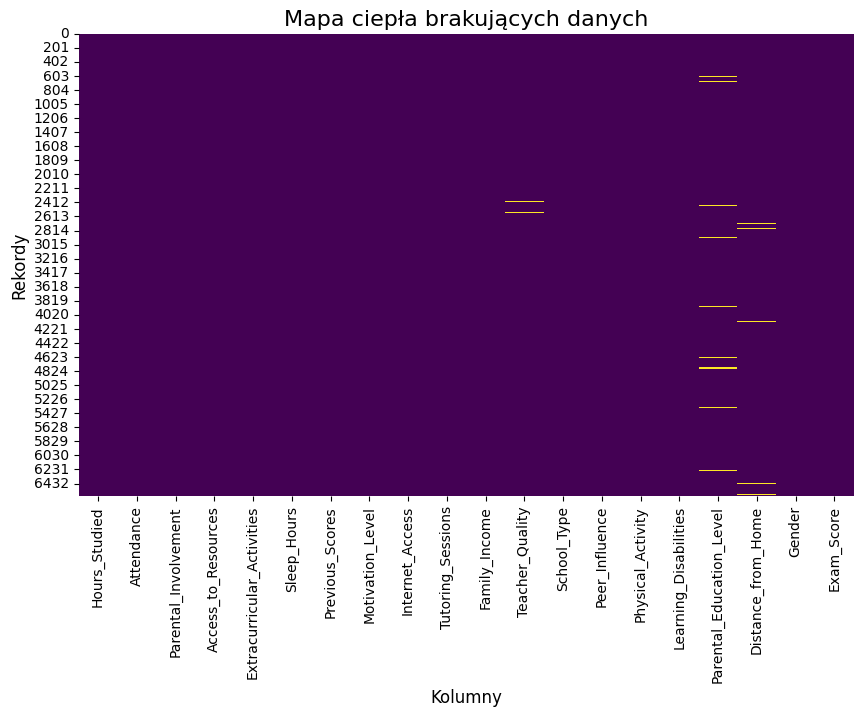

In [6]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Mapa ciepła brakujących danych', fontsize=16)
plt.xlabel('Kolumny', fontsize=12)
plt.ylabel('Rekordy', fontsize=12)

plt.show()


2. Przekształcenie danych.

2.1. Usuniecie niepotrzebnych kolumn.

In [7]:
df.drop(['Physical_Activity', 'Peer_Influence', 'Parental_Education_Level', 'Family_Income'], axis=1, inplace=True)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Learning_Disabilities,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Medium,Public,No,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,No,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,No,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,No,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,High,Public,No,Near,Female,70


2.2. Mapowanie kolumn: Gender, Distance_from_Home, Access_to_Resources, Parental_Involvement, Motivation_Level, Teacher_Quality. 

Zamiana na wartosci liczbowe oraz uzupelnienie brakujących danych medianą gdzie trzeba.

In [8]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df['Distance_from_Home'] = df['Distance_from_Home'].map({'Near': 0, 'Moderate': 1, 'Far': 2})
median_distance = df['Distance_from_Home'].median()
df['Distance_from_Home'].fillna(median_distance, inplace=True)

df['Access_to_Resources'] = df['Access_to_Resources'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Parental_Involvement'] = df['Parental_Involvement'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Motivation_Level'] = df['Motivation_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

df['Teacher_Quality'] = df['Teacher_Quality'].map({'Low': 0, 'Medium': 1, 'High': 2})
median_distance = df['Teacher_Quality'].median()
df['Teacher_Quality'].fillna(median_distance, inplace=True)

2.3. Dummying kolumn ['Learning_Disabilities','Internet_Access', 'School_Type', 'Extracurricular_Activities'].

In [9]:
df = pd.get_dummies(df, columns=['Learning_Disabilities','Internet_Access', 'School_Type', 'Extracurricular_Activities'], drop_first=True)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Distance_from_Home,Gender,Exam_Score,Learning_Disabilities_Yes,Internet_Access_Yes,School_Type_Public,Extracurricular_Activities_Yes
0,23,84,0,2,7,73,0,0,1.0,0.0,0,67,False,True,True,False
1,19,64,0,1,8,59,0,2,1.0,1.0,1,61,False,True,True,False
2,24,98,1,1,7,91,1,2,1.0,0.0,0,74,False,True,True,True
3,29,89,0,1,8,98,1,1,1.0,1.0,0,71,False,True,True,True
4,19,92,1,1,6,65,1,3,2.0,0.0,1,70,False,True,True,True


In [10]:
# Przekształcenie kolumny 'Exam_Score' i previous score na 1 dla wartosci wiekszej lub rownej 70%
df['Exam_Score'] = (df['Exam_Score'] > 69).astype(int)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Distance_from_Home,Gender,Exam_Score,Learning_Disabilities_Yes,Internet_Access_Yes,School_Type_Public,Extracurricular_Activities_Yes
0,23,84,0,2,7,73,0,0,1.0,0.0,0,0,False,True,True,False
1,19,64,0,1,8,59,0,2,1.0,1.0,1,0,False,True,True,False
2,24,98,1,1,7,91,1,2,1.0,0.0,0,1,False,True,True,True
3,29,89,0,1,8,98,1,1,1.0,1.0,0,1,False,True,True,True
4,19,92,1,1,6,65,1,3,2.0,0.0,1,1,False,True,True,True


In [11]:
# Zresetowanie list do zapisu wyników poszczególnych modeli
models = ['Linear Regression', 'Logistic Regression', 'KNN', 'SVM']
accuracies = []
precisions = []
recalls = []
f1_scores = []

3. Podzielenie zestawu na train i test

In [12]:
y = df['Exam_Score']
X = df.drop(['Exam_Score'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

4. Modele - przewidywanie czy wynik egzaminu jest powyżej 70 puntów (1) czy poniżej (0)

4.1.0 Regresja liniowa domyślna

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.26020096884813143
Mean Squared Error: 0.09549293140351718
Root Mean Squared Error: 0.30901930587508153
R² Score: 0.4852982568454889


4.1.1 Regresja liniowa z optymalizacją - regularyzacja Ridge, Lasso i ElasticNet

In [14]:
# Ridge
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge_grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

# Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)

# ElasticNet Regression
elastic_net = ElasticNet(max_iter=10000)
elastic_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 1]  # l1_ratio = 1 to czyste Lasso, a bliżej 0 to czyste Ridge
}
elastic_grid = GridSearchCV(elastic_net, elastic_param_grid, scoring='neg_mean_squared_error', cv=5)
elastic_grid.fit(X_train, y_train)

# Najlepsze modele
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_
best_elastic = elastic_grid.best_estimator_

# Predykcja i ocena dla Ridge
y_pred_optimized = best_ridge.predict(X_test)
mae_opt = mean_absolute_error(y_test, y_pred_optimized)
mse_opt = mean_squared_error(y_test, y_pred_optimized)
rmse_opt = np.sqrt(mse_opt)
r2_opt = r2_score(y_test, y_pred_optimized)

print("Najlepsze parametry dla Ridge Regression:", ridge_grid.best_params_)
print(f"Mean Absolute Error (optimized): {mae_opt}")
print(f"Mean Squared Error (optimized): {mse_opt}")
print(f"Root Mean Squared Error (optimized): {rmse_opt}")
print(f"R² Score (optimized): {r2_opt}")


# Predykcja i ocena dla Lasso
y_pred_lasso = best_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - najlepsze parametry:", lasso_grid.best_params_)
print(f"Mean Absolute Error (Lasso): {mae_lasso}")
print(f"Mean Squared Error (Lasso): {mse_lasso}")
print(f"Root Mean Squared Error (Lasso): {rmse_lasso}")
print(f"R² Score (Lasso): {r2_lasso}")

# Predykcja i ocena dla ElasticNet
y_pred_elastic = best_elastic.predict(X_test)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("\nElasticNet - najlepsze parametry:", elastic_grid.best_params_)
print(f"Mean Absolute Error (ElasticNet): {mae_elastic}")
print(f"Mean Squared Error (ElasticNet): {mse_elastic}")
print(f"Root Mean Squared Error (ElasticNet): {rmse_elastic}")
print(f"R² Score (ElasticNet): {r2_elastic}")


Najlepsze parametry dla Ridge Regression: {'alpha': 10}
Mean Absolute Error (optimized): 0.26022625022828244
Mean Squared Error (optimized): 0.09550699478647341
Root Mean Squared Error (optimized): 0.30904205989876754
R² Score (optimized): 0.4852224559708499
Lasso Regression - najlepsze parametry: {'alpha': 0.01}
Mean Absolute Error (Lasso): 0.2629417117550651
Mean Squared Error (Lasso): 0.09846911772770106
Root Mean Squared Error (Lasso): 0.3137978931218326
R² Score (Lasso): 0.4692567732875379

ElasticNet - najlepsze parametry: {'alpha': 0.01, 'l1_ratio': 0.1}
Mean Absolute Error (ElasticNet): 0.2604392165785467
Mean Squared Error (ElasticNet): 0.09568973285143458
Root Mean Squared Error (ElasticNet): 0.3093375710311222
R² Score (ElasticNet): 0.4842375076695066


In [15]:
# Funkcja pomocnicza do obliczenia metryk klasyfikacyjnych (dla klasyfikatorów)
def calculate_classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

4.2.0 Regresja logistyczna domyślna

In [16]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
acc_logistic, prec_logistic, rec_logistic, f1_logistic = calculate_classification_metrics(y_test, y_pred_logistic)

# # Zapis wyników
# accuracies.append(acc_logistic)
# precisions.append(prec_logistic)
# recalls.append(rec_logistic)
# f1_scores.append(f1_logistic)

conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)
accuracy = accuracy_score(y_test, y_pred_logistic)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"Accuracy: {accuracy}")

Confusion Matrix:
 [[1455   40]
 [  76  412]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1495
           1       0.91      0.84      0.88       488

    accuracy                           0.94      1983
   macro avg       0.93      0.91      0.92      1983
weighted avg       0.94      0.94      0.94      1983

Accuracy: 0.9415027735753908


4.2.1 Regresja logistyczna z optymalizacją 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Siatka parametrów do optymalizacji
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # regularyzacja L1 lub L2
    'solver': ['liblinear', 'saga']  # solvery obsługujące L1 i L2
}


logistic = LogisticRegression(max_iter=1000)
logistic_grid = GridSearchCV(logistic, param_grid, scoring='accuracy', cv=5)
logistic_grid.fit(X_train, y_train)


best_logistic = logistic_grid.best_estimator_

# Predykcja i ocena modelu
y_pred_logistic_optimized = best_logistic.predict(X_test)
acc_logistic_opt = accuracy_score(y_test, y_pred_logistic_optimized)
conf_matrix_opt = confusion_matrix(y_test, y_pred_logistic_optimized)
class_report_opt = classification_report(y_test, y_pred_logistic_optimized)

print("Najlepsze parametry dla Logistic Regression:", logistic_grid.best_params_)
print("\nConfusion Matrix (optimized):\n", conf_matrix_opt)
print("\nClassification Report (optimized):\n", class_report_opt)
print(f"Accuracy (optimized): {acc_logistic_opt}")


c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Najlepsze parametry dla Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Confusion Matrix (optimized):
 [[1454   41]
 [  77  411]]

Classification Report (optimized):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1495
           1       0.91      0.84      0.87       488

    accuracy                           0.94      1983
   macro avg       0.93      0.91      0.92      1983
weighted avg       0.94      0.94      0.94      1983

Accuracy (optimized): 0.940494200706001


4.3.0 KNN

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
acc_knn, prec_knn, rec_knn, f1_knn = calculate_classification_metrics(y_test, y_pred_knn)

# # Zapis wyników
# accuracies.append(acc_knn)
# precisions.append(prec_knn)
# recalls.append(rec_knn)
# f1_scores.append(f1_knn)

conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)

print("=== Wyniki Klasyfikacji KNN ===")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"Accuracy: {accuracy:.2f}")

=== Wyniki Klasyfikacji KNN ===
Confusion Matrix:
 [[1392  103]
 [ 149  339]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1495
           1       0.77      0.69      0.73       488

    accuracy                           0.87      1983
   macro avg       0.84      0.81      0.82      1983
weighted avg       0.87      0.87      0.87      1983

Accuracy: 0.87


4.3.1 KNN z optymalizacją

In [19]:
# Siatka parametrów do optymalizacji
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # liczba sąsiadów
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # metryki odległości
    'weights': ['uniform', 'distance']  # waga sąsiadów
}


knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid_knn, scoring='accuracy', cv=5)
knn_grid.fit(X_train, y_train)

best_knn = knn_grid.best_estimator_

# Predykcja i ocena modelu
y_pred_knn_optimized = best_knn.predict(X_test)
acc_knn_opt = accuracy_score(y_test, y_pred_knn_optimized)
conf_matrix_knn_opt = confusion_matrix(y_test, y_pred_knn_optimized)
class_report_knn_opt = classification_report(y_test, y_pred_knn_optimized)

print("Najlepsze parametry dla KNN:", knn_grid.best_params_)
print("\nConfusion Matrix (optimized):\n", conf_matrix_knn_opt)
print("\nClassification Report (optimized):\n", class_report_knn_opt)
print(f"Accuracy (optimized): {acc_knn_opt:.2f}")


Najlepsze parametry dla KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

Confusion Matrix (optimized):
 [[1409   86]
 [ 146  342]]

Classification Report (optimized):
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1495
           1       0.80      0.70      0.75       488

    accuracy                           0.88      1983
   macro avg       0.85      0.82      0.84      1983
weighted avg       0.88      0.88      0.88      1983

Accuracy (optimized): 0.88


4.4.0 SVM

In [20]:
model_svc = svm.SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
acc_svc, prec_svc, rec_svc, f1_svc = calculate_classification_metrics(y_test, y_pred_svc)

# # Zapis wyników
# accuracies.append(acc_svc)
# precisions.append(prec_svc)
# recalls.append(rec_svc)
# f1_scores.append(f1_svc)

conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)
accuracy = accuracy_score(y_test, y_pred_svc)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"Accuracy: {accuracy}")


Confusion Matrix:
 [[1417   78]
 [ 156  332]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1495
           1       0.81      0.68      0.74       488

    accuracy                           0.88      1983
   macro avg       0.86      0.81      0.83      1983
weighted avg       0.88      0.88      0.88      1983

Accuracy: 0.8819969742813918


4.4.1 SVM z optymalizacją

In [21]:
# Siatka parametrów do optymalizacji
param_grid_svc = {
    'C': [0.1, 1, 10],  # Mniejszy zakres C
    'kernel': ['linear', 'rbf'],  # Tylko dwa jądra
    'gamma': ['scale', 'auto'],  # Zmniejszamy zakres gamma
    'shrinking': [True]  # Wybór jednej opcji shrinking
}


svc = SVC()
svc_grid = GridSearchCV(svc, param_grid_svc, scoring='accuracy', cv=5)
svc_grid.fit(X_train, y_train)


best_svc = svc_grid.best_estimator_

# Predykcja i ocena modelu
y_pred_svc_optimized = best_svc.predict(X_test)
acc_svc_opt = accuracy_score(y_test, y_pred_svc_optimized)
conf_matrix_svc_opt = confusion_matrix(y_test, y_pred_svc_optimized)
class_report_svc_opt = classification_report(y_test, y_pred_svc_optimized)

print("Najlepsze parametry dla SVC:", svc_grid.best_params_)
print("\nConfusion Matrix (optimized):\n", conf_matrix_svc_opt)
print("\nClassification Report (optimized):\n", class_report_svc_opt)
print(f"Accuracy (optimized): {acc_svc_opt:.2f}")


Najlepsze parametry dla SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}

Confusion Matrix (optimized):
 [[1453   42]
 [  78  410]]

Classification Report (optimized):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1495
           1       0.91      0.84      0.87       488

    accuracy                           0.94      1983
   macro avg       0.93      0.91      0.92      1983
weighted avg       0.94      0.94      0.94      1983

Accuracy (optimized): 0.94


Porównanie wynikow.

In [22]:
# Normalizacja danych przy użyciu MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Trening modeli KNN i SVM na znormalizowanych danych
knn_model_scaled = KNeighborsClassifier(n_neighbors=5)
knn_model_scaled.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn_model_scaled.predict(X_test_scaled)

svc_model_scaled = svm.SVC()
svc_model_scaled.fit(X_train_scaled, y_train)
y_pred_svc_scaled = svc_model_scaled.predict(X_test_scaled)


# Obliczenie metryk dla modeli na znormalizowanych danych
knn_accuracy_scaled, knn_precision_scaled, knn_recall_scaled, knn_f1_scaled = calculate_classification_metrics(y_test, y_pred_knn_scaled)
svc_accuracy_scaled, svc_precision_scaled, svc_recall_scaled, svc_f1_scaled = calculate_classification_metrics(y_test, y_pred_svc_scaled)

# Tworzenie DataFrame do zaprezentowania wyników
results_scaled = {
    "Model": ["KNN (Scaled)", "SVM (Scaled)"],
    "Accuracy": [knn_accuracy_scaled, svc_accuracy_scaled],
    "Precision": [knn_precision_scaled, svc_precision_scaled],
    "Recall": [knn_recall_scaled, svc_recall_scaled],
    "F1 Score": [knn_f1_scaled, svc_f1_scaled]
}
results_df = pd.DataFrame(results_scaled)

# Wyświetlenie wyników
print("Wyniki modeli KNN i SVM po normalizacji danych :")
print(results_df)

# Normalizacja poprawiła skuteczność SVM, który osiągnął wyraźnie wyższe wyniki. 

NameError: name 'MinMaxScaler' is not defined

In [ ]:
# Standaryzacja danych przy użyciu StandardScaler
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_test_standardized = scaler_standard.transform(X_test)

# Trening modeli KNN i SVM na standaryzowanych danych
knn_model_standardized = KNeighborsClassifier(n_neighbors=5)
knn_model_standardized.fit(X_train_standardized, y_train)
y_pred_knn_standardized = knn_model_standardized.predict(X_test_standardized)

svc_model_standardized = svm.SVC()
svc_model_standardized.fit(X_train_standardized, y_train)
y_pred_svc_standardized = svc_model_standardized.predict(X_test_standardized)

# Obliczenie metryk dla modeli na standaryzowanych danych
knn_accuracy_standard, knn_precision_standard, knn_recall_standard, knn_f1_standard = calculate_classification_metrics(y_test, y_pred_knn_standardized)
svc_accuracy_standard, svc_precision_standard, svc_recall_standard, svc_f1_standard = calculate_classification_metrics(y_test, y_pred_svc_standardized)

# Tworzenie DataFrame do zaprezentowania wyników standaryzacji
results_standardized = {
    "Model": ["KNN (Standardized)", "SVM (Standardized)"],
    "Accuracy": [knn_accuracy_standard, svc_accuracy_standard],
    "Precision": [knn_precision_standard, svc_precision_standard],
    "Recall": [knn_recall_standard, svc_recall_standard],
    "F1 Score": [knn_f1_standard, svc_f1_standard]
}
results_df_standard = pd.DataFrame(results_standardized)

# Wyświetlenie wyników
print("Wyniki modeli KNN i SVM po standaryzacji danych:")
print(results_df_standard)

# Standaryzacja poprawiła wyniki SVM, który osiągnął bardzo wysoką skuteczność. 

Wyniki modeli KNN i SVM po standaryzacji danych:
                Model  Accuracy  Precision    Recall  F1 Score
0  KNN (Standardized)  0.859808   0.855830  0.859808  0.849787
1  SVM (Standardized)  0.930408   0.929628  0.930408  0.928755


Porównanie wyników oryginalnych danych, po normalizacji oraz po standaryzacji.

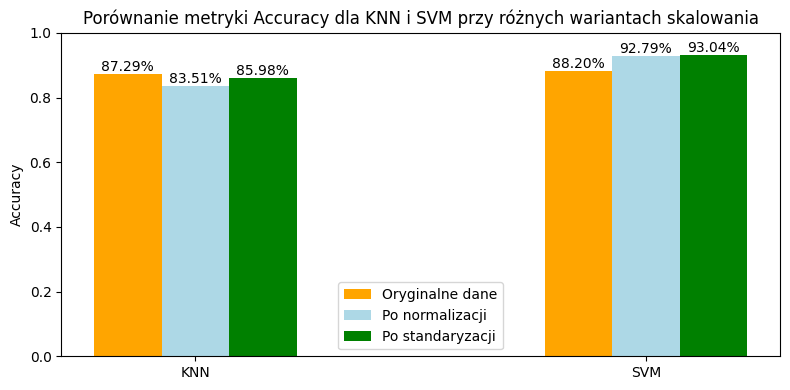

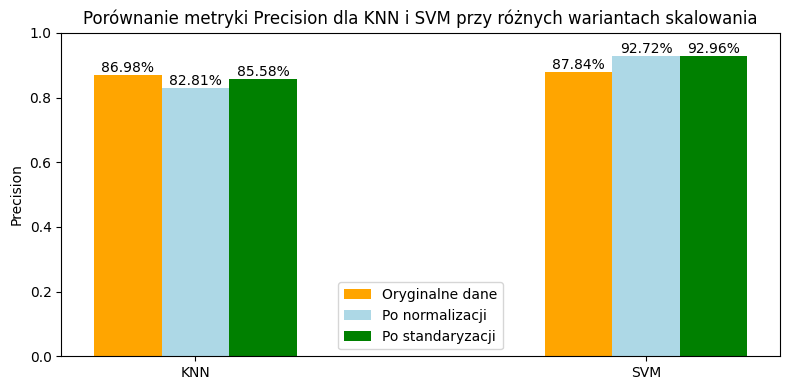

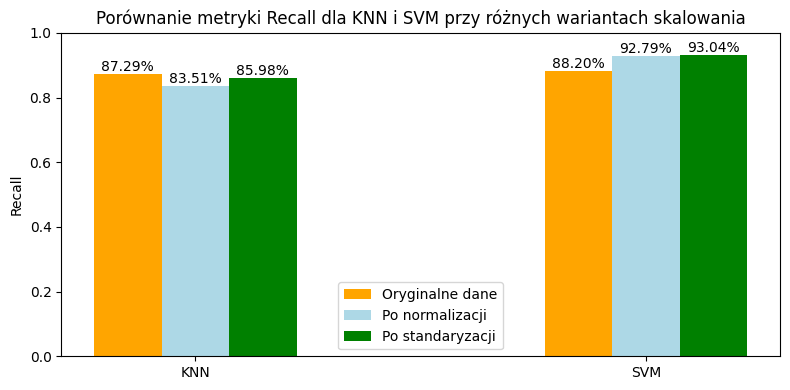

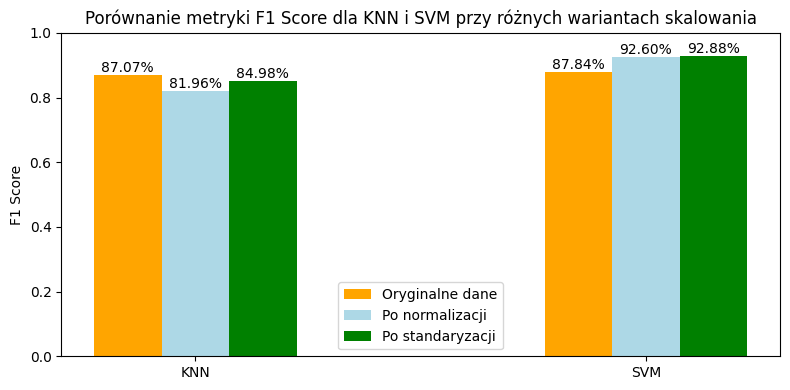

In [ ]:
results_df = pd.DataFrame({
    "Model": ["KNN (No Scaling)", "SVM (No Scaling)", "KNN (Normalized)", "SVM (Normalized)", "KNN (Standardized)", "SVM (Standardized)"],
    "Accuracy": [acc_knn, acc_svc, knn_accuracy_scaled, svc_accuracy_scaled, knn_accuracy_standard, svc_accuracy_standard],
    "Precision": [prec_knn, prec_svc, knn_precision_scaled, svc_precision_scaled, knn_precision_standard, svc_precision_standard],
    "Recall": [rec_knn, rec_svc, knn_recall_scaled, svc_recall_scaled, knn_recall_standard, svc_recall_standard],
    "F1 Score": [f1_knn, f1_svc, knn_f1_scaled, svc_f1_scaled, knn_f1_standard, svc_f1_standard]
})

# Tworzenie wykresów dla każdej metryki
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
x_labels = ["KNN", "SVM"]
scales = ["Oryginalne dane", "Po normalizacji", "Po standaryzacji"]

for metric in metrics:
    plt.figure(figsize=(8, 4))
    x = np.arange(len(x_labels))  # KNN, SVM
    width = 0.15  # Szerokość słupków

    # Wartości dla każdej skali
    values_no_scaling = results_df[results_df['Model'].str.contains("No Scaling")][metric].values
    values_normalized = results_df[results_df['Model'].str.contains("Normalized")][metric].values
    values_standardized = results_df[results_df['Model'].str.contains("Standardized")][metric].values

    # Wykres słupkowy
    plt.bar(x - width, values_no_scaling, width, label='Oryginalne dane', color='orange')
    plt.bar(x, values_normalized, width, label='Po normalizacji', color='lightblue')
    plt.bar(x + width, values_standardized, width, label='Po standaryzacji', color='green')

    # Dostosowanie wykresu
    plt.ylabel(metric)
    plt.title(f'Porównanie metryki {metric} dla KNN i SVM przy różnych wariantach skalowania')
    plt.xticks(x, x_labels)
    plt.ylim(0, 1)
    plt.legend()

    # Dodanie wartości nad słupkami
    for i, value in enumerate(values_no_scaling):
        plt.text(i - width, value, f"{value:.2%}", ha='center', va='bottom')
    for i, value in enumerate(values_normalized):
        plt.text(i, value, f"{value:.2%}", ha='center', va='bottom')
    for i, value in enumerate(values_standardized):
        plt.text(i + width, value, f"{value:.2%}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()